# Ensemble Hyperparams

In [28]:
from glob import glob
import json
from matplotlib import pyplot as plt
from pathlib import Path
import json
import numpy as np
import re
import pandas as pd
DATASET='scidoc'
RUN_DIR = 'run-2022-10-25-10-38'

FN_MATCHER = r'local-(?P<local>[0-9]\.[0-9])-global-(?P<global>[0-9]\.[0-9])-rho-(?P<rho>[0-9]\.[0-9]).json'
RESULTS_DIR = Path('./results') / DATASET / 'evaluations' / RUN_DIR
PLOTS_OUTPUT_DIR = RESULTS_DIR / 'plots'
PLOTS_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
def parse_ensemble_results(dir: Path):
    files = list(dir.glob('local-*.json'))
    res = np.zeros((len(files), 6))
    for i, filename in enumerate(files):
        matches = re.search(FN_MATCHER, str(filename))
        f = open(filename, 'r')
        data = json.load(f)
        res[i][0] = float(matches.group('global'))
        res[i][1] = float(matches.group('local'))
        res[i][2] = float(matches.group('rho'))
        res[i][3] = float(data['scores']['pmi'])
        res[i][4] = float(data['scores']['npmi'])
        res[i][5] = float(data['scores']['distinctiveness'])
    df = pd.DataFrame(
        res,
        columns=[
            'global_weight',
            'local_weight',
            'rho',
            "pmi",
            'npmi',
            'distinctiveness'
        ]
    )
    return df
df = parse_ensemble_results(RESULTS_DIR)

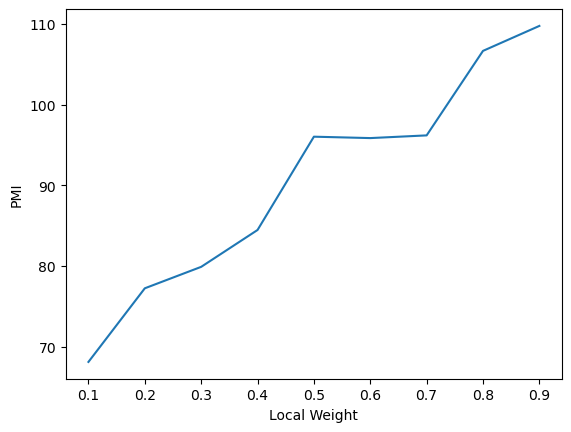

In [55]:
df[df.rho==0.5].sort_values('local_weight').plot.line('local_weight', y='pmi', legend=None)
plt.ylabel('PMI')
plt.xlabel('Local Weight')
plt.savefig(PLOTS_OUTPUT_DIR/'weight-pmi.png')

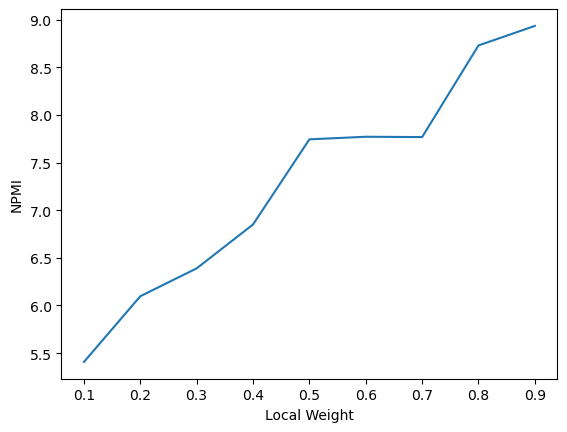

In [56]:
df[df.rho == 0.5].sort_values('local_weight').plot.line('local_weight',
                                                        y='npmi',
                                                        legend=None)
plt.ylabel('NPMI')
plt.xlabel('Local Weight')
plt.savefig(PLOTS_OUTPUT_DIR / 'weight-npmi.png')


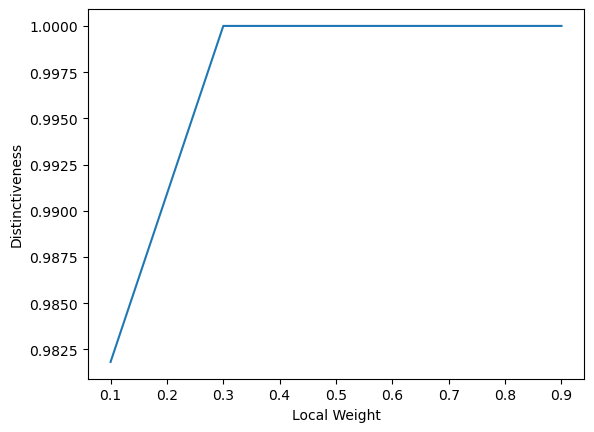

In [58]:
df[df.rho == 0.5].sort_values('local_weight').plot.line('local_weight',
                                                        y='distinctiveness',
                                                        legend=None)
plt.ylabel('Distinctiveness')
plt.xlabel('Local Weight')
plt.savefig(PLOTS_OUTPUT_DIR / 'weight-distinctiveness.png')